In [239]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
import pickle as pkl
import torch
from pathlib import Path
from typing import List, Tuple
from PIL import Image, ImageDraw, ImageFont
import os
import json
import numpy as np
import cv2 as cv
from copy import deepcopy

In [147]:
from drawlib import *

# Part 1: scribbles

In [148]:
IMGRES = 256
IMGRES = 512     # for appendix


def get_image_draws(exppath, label=None, which=(0, (0,)), imgsize=IMGRES, use_seg=False):
    with open(Path(exppath) / "outbatches.pkl", "rb") as f:
        outbatches = pkl.load(f)

    imagerow = []
    for whichspec in which:
        batchid, whichseeds = whichspec
        outbatch = outbatches[batchid]
        for whichseed in whichseeds:
            example = outbatch[whichseed]
            imgdata = example.image_data if not use_seg else example.seg_data.convert("L")
            imagerow.append(DrawImage(imgdata, imgsize=imgsize))
        imagerow.append(Draw(20, 0))
    del imagerow[-1]
    return DrawRow(*imagerow)    


def display_bboxes(bboxes, prompts=None, size=(512, 512), _img=None, linewidth=3):
    img = Image.new(mode="RGB", size=size) if _img is None else _img.copy()
    width, height = img.size
    imdraw = ImageDraw.Draw(img)
    if prompts is None:
        prompts = [None] * len(bboxes)
    for bbox, prompt in zip(bboxes, prompts):
        imdraw.rectangle([(int(bbox[0] * width), int(bbox[1] * height)), (int(bbox[2] * width), int(bbox[3] * height))], outline=(255, 0, 0), width=linewidth)
        if prompt is not None:
            imdraw.text((int(bbox[0] * width), int(bbox[1] * height)), prompt, font_size=32)
    return img



In [162]:
def get_image_draw(exppath, whichbatch=0, whichseed=0, imgsize=256, use_seg=False, rotate=0):
    with open(Path(exppath) / "outbatches.pkl", "rb") as f:
        outbatches = pkl.load(f)
        
    with open(Path(exppath) / "args.json") as f:
        args = json.load(f)

    imagerow = []
    outbatch = outbatches[whichbatch]
    example = outbatch[whichseed]
    imgdata = example.image_data if not use_seg else example.seg_data2.convert("L")
    ret = DrawImage(imgdata, imgsize=imgsize, rotate=rotate)
    return ret, args


In [181]:
FONTSIZE=43

In [208]:
allimages = []

/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
774 306
(774, 306)


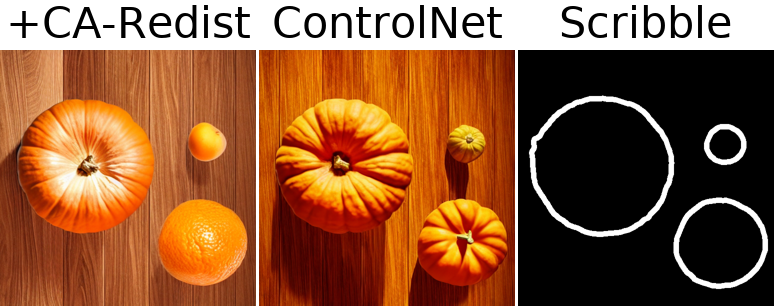

In [209]:
whichbatch = 3
whichseed = 3

imgs = []
labeltexts = []

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5_scribbles/generated_threeorange1.pkl_1", whichbatch, whichseed, rotate=90)
paramtext = DrawText(f"+CA-Redist", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_scribbles/generated_threeorange1.pkl_1", whichbatch, whichseed, rotate=90)
paramtext = DrawText(f"ControlNet", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_scribbles/generated_threeorange1.pkl_1", whichbatch, whichseed, use_seg=True, rotate=90)
paramtext = DrawText(f"Scribble", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)


    
todraw_ediffi = DrawRow(*imgs)
todraw_ediffi_labels = DrawRow(*labeltexts)
todraw_ediffi = DrawCol(todraw_ediffi_labels, todraw_ediffi)
allimages.append(todraw_ediffi)

print(todraw_ediffi.get_width(), todraw_ediffi.get_height())
img = todraw_ediffi.drawself()
print(img.size)
display(img)

/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
774 256
(774, 256)


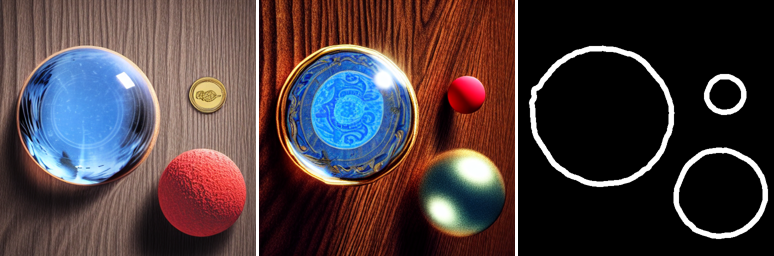

In [210]:
whichbatch = 0
whichseed = 0

imgs = []
labeltexts = []

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5_scribbles/generated_extradev.pkl_1", whichbatch, whichseed, rotate=90)
paramtext = DrawText(f"+CA-Redist", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_scribbles/generated_extradev.pkl_1", whichbatch, whichseed, rotate=90)
paramtext = DrawText(f"ControlNet", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_scribbles/generated_extradev.pkl_1", whichbatch, whichseed, use_seg=True, rotate=90)
paramtext = DrawText(f"Scribble", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

    
todraw_ediffi = DrawRow(*imgs)
todraw_ediffi_labels = DrawRow(*labeltexts)
# todraw_ediffi = DrawCol(todraw_ediffi_labels, todraw_ediffi)
allimages.append(todraw_ediffi)

print(todraw_ediffi.get_width(), todraw_ediffi.get_height())
img = todraw_ediffi.drawself()
print(img.size)
display(img)

/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
774 256
(774, 256)


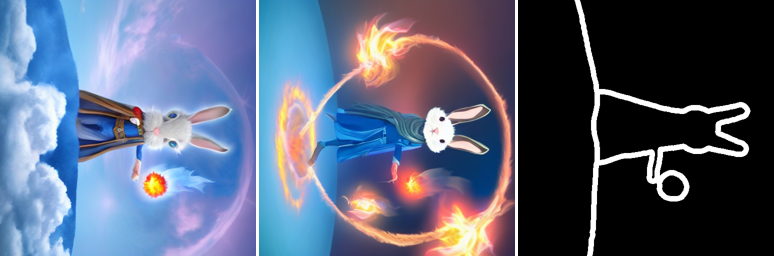

In [211]:
whichbatch = 2
whichseed = 1

imgs = []
labeltexts = []


img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5_scribbles/generated_extradev.pkl_1",
                           whichbatch, whichseed, rotate=90)
paramtext = DrawText(f"+CA-Redist", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)




img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_scribbles/generated_extradev.pkl_1",
                           whichbatch, whichseed, rotate=90)
paramtext = DrawText(f"ControlNet", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_scribbles/generated_extradev.pkl_1", 
                           whichbatch, whichseed, use_seg=True, rotate=90)
paramtext = DrawText(f"Scribble", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

    
todraw_ediffi = DrawRow(*imgs)
todraw_ediffi_labels = DrawRow(*labeltexts)
# todraw_ediffi = DrawCol(todraw_ediffi_labels, todraw_ediffi)

allimages.append(todraw_ediffi)

print(todraw_ediffi.get_width(), todraw_ediffi.get_height())
img = todraw_ediffi.drawself()
print(img.size)
display(img)

# Part 2: Canny edges

### Example 1: pumpkin, orange and apricot but with edges from another example

['a highly detailed photorealistic image of {an apricot:7924463}, {a pumpkin:8606816} and {an orange:8600493} on {a wooden table:15835924}.']


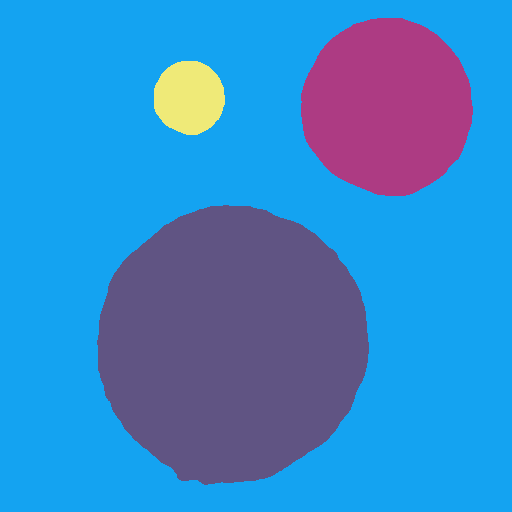

In [120]:
d = pkl.load(open("/USERSPACE/lukovdg1/controlnet11/evaldata/threeorange1.pkl", "rb"))
print(d[3].captions)
display(d[3].image_data)

example1 = deepcopy(d[3])

In [121]:
d = pkl.load(open("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5_scribbles/generated_threeorange1.pkl_1/outbatches.pkl", "rb"))

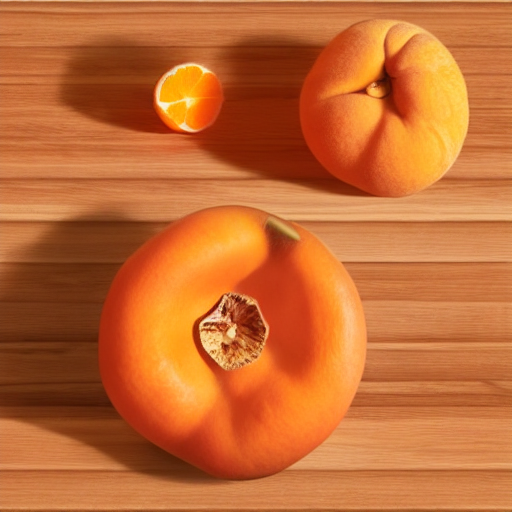

In [122]:
img = d[6][2].image_data
display(img)

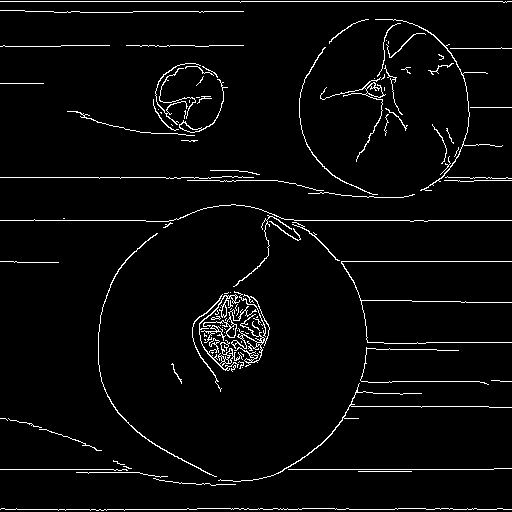

In [123]:
cond_imgtensor_np = np.array(img).astype("uint8")
canny = Image.fromarray(cv.Canny(cond_imgtensor_np, 80, 160))
display(canny)
example1.canny_data = canny

### Example 2: blue crystal ball and red tennis ball etc but canny from oranges (same as example 1)

['a highly detailed photorealistic image of {a gold coin:7069951}, {a blue crystal ball:5633996} and {a red tennis ball:3584971} on {a wooden table:10236894}.']


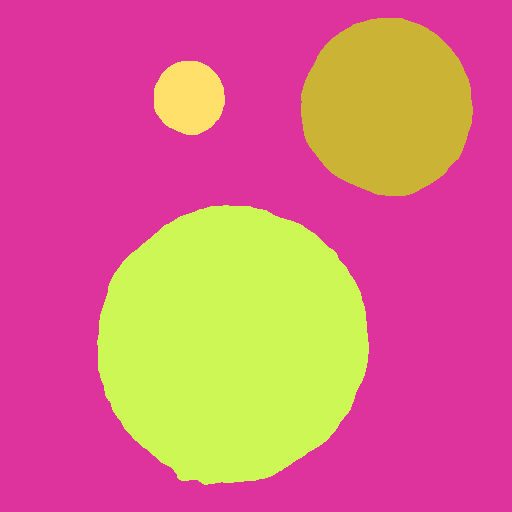

In [124]:
d = pkl.load(open("/USERSPACE/lukovdg1/controlnet11/evaldata/extradev.pkl", "rb"))
print(d[0].captions)
display(d[0].image_data)

example2 = deepcopy(d[0])

example2.canny_data = canny

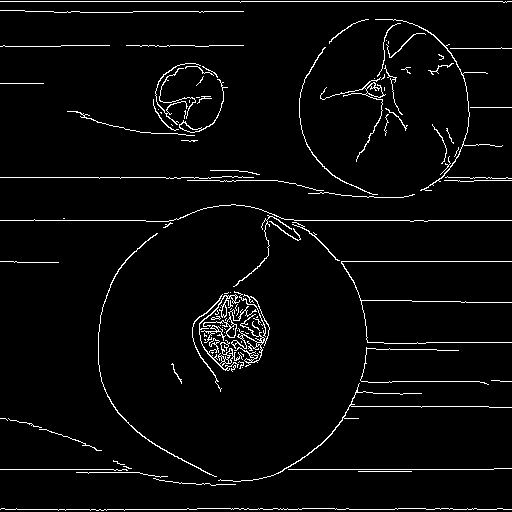

In [125]:
display(example1.canny_data) 

pkl.dump([example1, example2], open("evaldata/cannytest.pkl", "wb"))

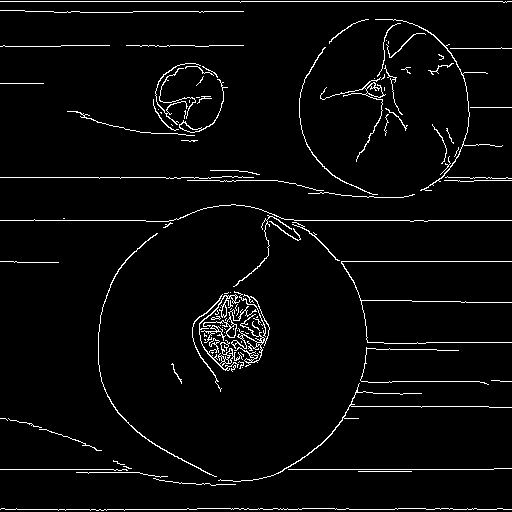

In [127]:
pkl.load(open("evaldata/cannytest.pkl", "rb"))[0].canny_data

In [189]:
# visualize

In [212]:
allimages.append(Draw(15, 15))

/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
774 306
(774, 306)


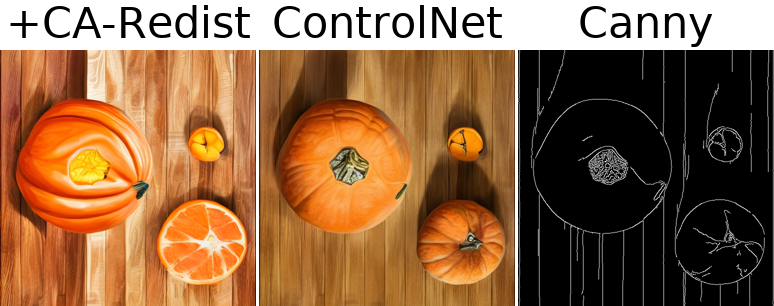

In [213]:
whichbatch = 0
whichseed = 2

imgs = []
labeltexts = []

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5_canny/generated_cannytest.pkl_1", whichbatch, whichseed, rotate=90)
paramtext = DrawText(f"+CA-Redist", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_canny/generated_cannytest.pkl_1", whichbatch, whichseed, rotate=90)
paramtext = DrawText(f"ControlNet", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_canny/generated_cannytest.pkl_1", whichbatch, whichseed, use_seg=True, rotate=90)
paramtext = DrawText(f"Canny", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

    
todraw_ediffi = DrawRow(*imgs)
todraw_ediffi_labels = DrawRow(*labeltexts)
todraw_ediffi = DrawCol(todraw_ediffi_labels, todraw_ediffi)
allimages.append(todraw_ediffi)

print(todraw_ediffi.get_width(), todraw_ediffi.get_height())
img = todraw_ediffi.drawself()
print(img.size)
display(img)

/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
774 256
(774, 256)


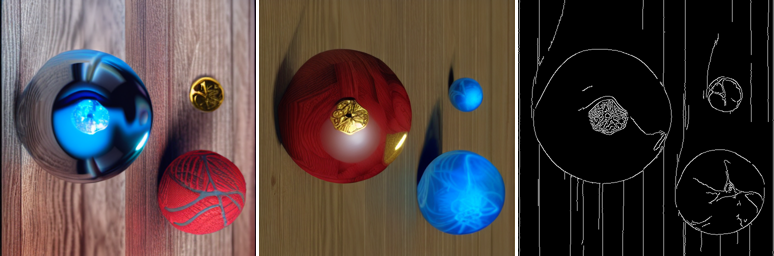

In [214]:
whichbatch = 1
whichseed = 4

imgs = []
labeltexts = []

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5_canny/generated_cannytest.pkl_1", whichbatch, whichseed, rotate=90)
paramtext = DrawText(f"+CA-Redist", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_canny/generated_cannytest.pkl_1", whichbatch, whichseed, rotate=90)
paramtext = DrawText(f"ControlNet", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_canny/generated_cannytest.pkl_1", whichbatch, whichseed, use_seg=True, rotate=90)
paramtext = DrawText(f"Canny", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)


    
todraw_ediffi = DrawRow(*imgs)
todraw_ediffi_labels = DrawRow(*labeltexts)
# todraw_ediffi = DrawCol(todraw_ediffi_labels, todraw_ediffi)
allimages.append(todraw_ediffi)

print(todraw_ediffi.get_width(), todraw_ediffi.get_height())
img = todraw_ediffi.drawself()
print(img.size)
display(img)

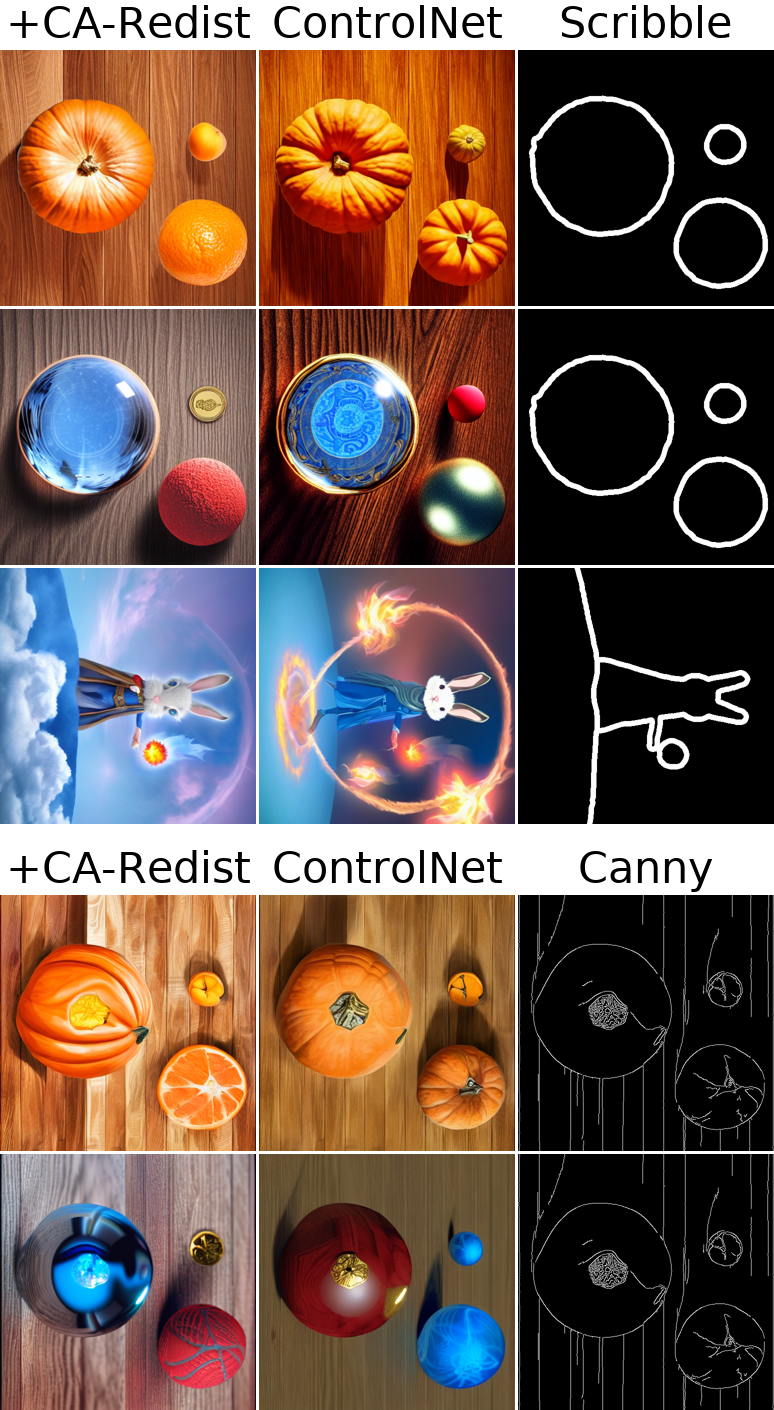

<class 'PIL.Image.Image'>


In [219]:
display(DrawCol(*allimages).drawself())
print(type(DrawCol(*allimages).drawself().rotate(90)))

### Example 3: rabbit mage

# Part 3: complex shapes

In [266]:
from dataset import COCOPanopticDataset, COCODataLoader
from copy import copy, deepcopy
import json
from PIL import Image
import pickle as pkl
import re

In [254]:
ds = COCOPanopticDataset(maindir="/USERSPACE/lukovdg1/coco2017", split="train", casmode="doublecross")
print(len(ds))

loading captions
loading panoptics
Creating examples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118287/118287 [00:00<00:00, 161529.47it/s]


Size stats:
{448: 43836, 512: 8442, 384: 45521}
Retained examples: 81636
Too many regions: 15322
Too few regions: 841
Too small: 20488
81636


In [256]:
_ds = deepcopy(ds)
ds.filter_ids({488160, 460872, 494550})
print(len(ds.examples[0]))

# https://cocodataset.org/#explore?id=488160

2


In [257]:
print(ds.examples[0][1])

[<dataset.COCOPanopticExample object at 0x7fa80ab7cb20>, <dataset.COCOPanopticExample object at 0x7fa801032e80>, <dataset.COCOPanopticExample object at 0x7fa8091deb80>]


In [267]:
def crop_and_resize(x, size=512, resample=Image.BICUBIC):
    if x.size == (size, size):
        return x
    w, h = x.size
    print(w, h)
    s = min(w, h)
    # compute maximum centercrop
    w_remain, h_remain = w - s, h - s
    x = x.crop((round(w_remain / 2), round(h_remain / 2), w - (w_remain - round(w_remain / 2)), h - (h_remain - round(h_remain / 2))))
    print(x.size)
    x = x.resize((size, size), resample=resample)
    print(x.size)
    return x

def multiple_replace(string, rep_dict):
    pattern = re.compile("|".join([re.escape(k) for k in sorted(rep_dict,key=len,reverse=True)]), flags=re.DOTALL)
    return pattern.sub(lambda x: rep_dict[x.group(0)], string)    

def prep_dev_ex(example, caption=None, swaps=None):
    example.image_data = crop_and_resize(example.load_image())
    example.image_path = None
    example.seg_data = crop_and_resize(example.load_seg_image(), resample=Image.NEAREST)
    example.seg_path = None
    example.cropsize = 512
    if caption is not None:
        example.captions = [caption]
    
    example2 = deepcopy(example)
    example2.captions = [multiple_replace(caption, swaps) for caption in example.captions]
    
    for k in example2.seg_info:
        v = example2.seg_info[k]
        if v["caption"] in swaps:
            print(f'{k} swapping: {v} --> {swaps[v["caption"]]}')
            example2.seg_info[k]["caption"] = swaps[v["caption"]]
            
    return example, example2


def display_example(example):
    display(example.load_image())
    display(example.load_seg_image())
    print(example.captions)
    print(json.dumps(example.seg_info, indent=4))
    

500 499
(499, 499)
(512, 512)
500 499
(499, 499)
(512, 512)
3755100 swapping: {'category_id': 17, 'caption': 'cat'} --> dog
6320768 swapping: {'category_id': 18, 'caption': 'dog'} --> cat


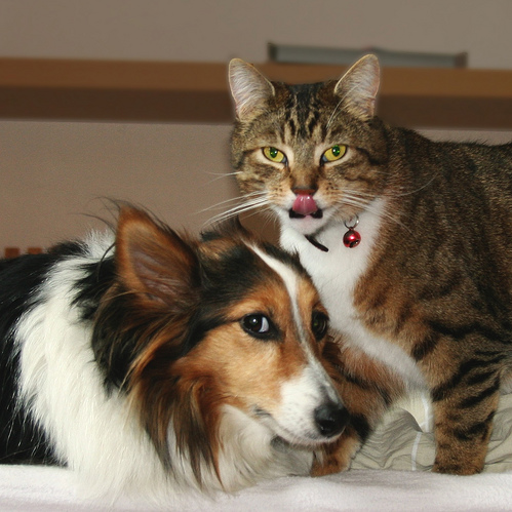

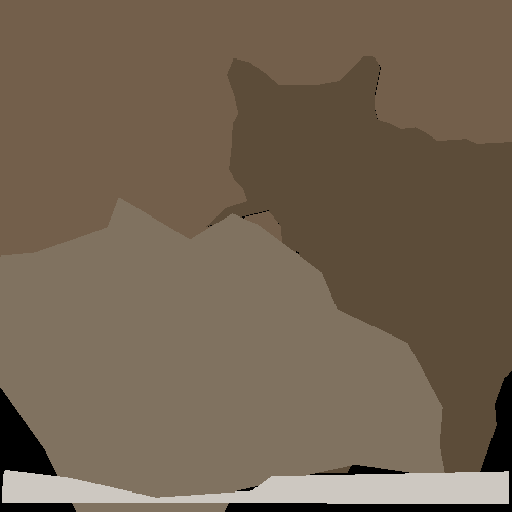

['{a brown dog:6320768} sitting next to {a grey cat:3755100}']
{
    "3755100": {
        "category_id": 17,
        "caption": "cat"
    },
    "6320768": {
        "category_id": 18,
        "caption": "dog"
    },
    "12699853": {
        "category_id": 65,
        "caption": "bed"
    },
    "4939635": {
        "category_id": 199,
        "caption": "wall"
    }
}


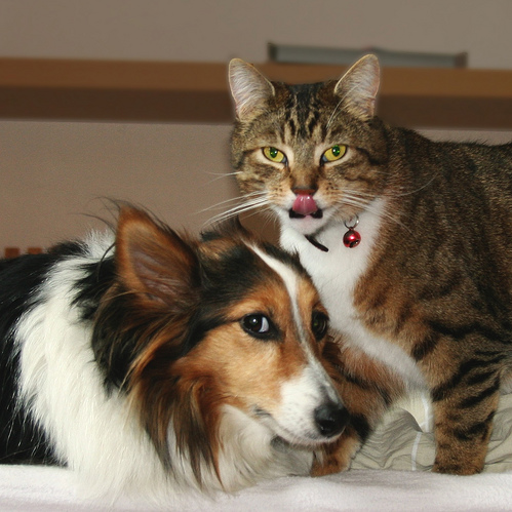

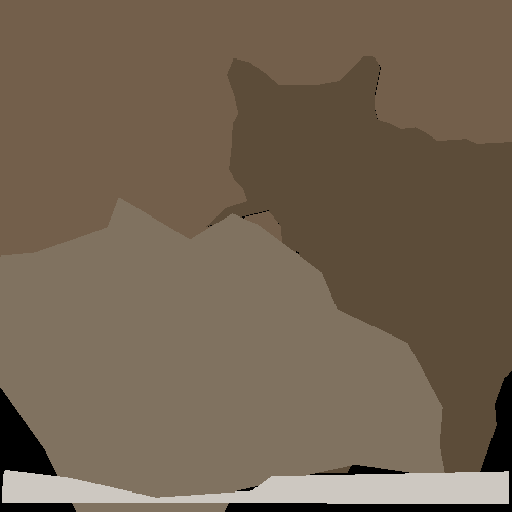

['{a brown cat:6320768} sitting next to {a grey dog:3755100}']
{
    "3755100": {
        "category_id": 17,
        "caption": "dog"
    },
    "6320768": {
        "category_id": 18,
        "caption": "cat"
    },
    "12699853": {
        "category_id": 65,
        "caption": "bed"
    },
    "4939635": {
        "category_id": 199,
        "caption": "wall"
    }
}


In [268]:
catdogexample = deepcopy(ds.examples[0][1][1])
#display_example(catdogexample)

catdog1, catdog2 = prep_dev_ex(catdogexample, caption="{a brown dog:6320768} sitting next to {a grey cat:3755100}", swaps={"cat": "dog", "dog": "cat"})
display_example(catdog1)
display_example(catdog2)

In [269]:
pkl.dump([catdog1, catdog2], open("evaldata/catdog.pkl", "wb"))

/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSansCondensed.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSansCondensed.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSansCondensed.ttf
1133 332
(1133, 332)


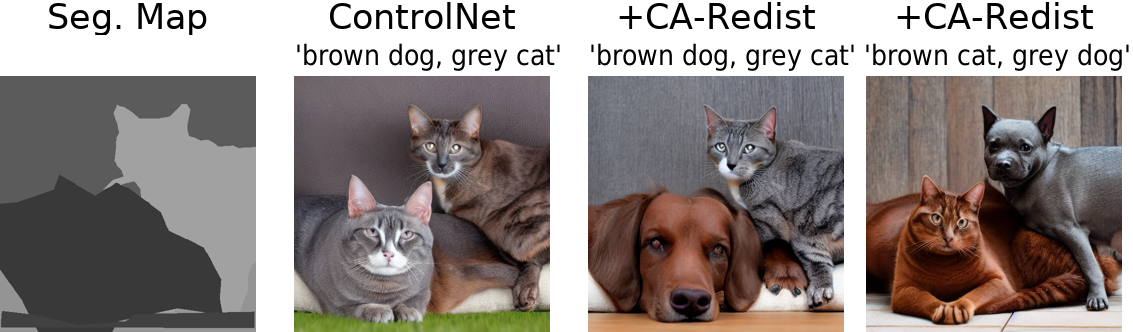

In [314]:
FONTSIZE = 35
FONTSIZE2 = 28

whichbatch = 0
whichseed = 3

imgs = []
labeltexts = []
sublabeltexts= []

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1/generated_catdog.pkl_1", 0, 2, use_seg=True)
paramtext = DrawText(f"Seg. Map", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE, color=(0,0,0), bold=False, italic=False)
sublabel = DrawText(f"", fontsize=FONTSIZE2, width=img.get_width()+14, height=FONTSIZE, color=(0,0,0), bold=False, italic=False)
imgs.append(img)
labeltexts.append(paramtext)
sublabeltexts.append(sublabel)
                     
imgs.append(Draw(32, 32))
labeltexts.append(Draw(32, 32))
sublabeltexts.append(Draw(32-16, 32-16))

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1/generated_catdog.pkl_1", 0, whichseed)
paramtext = DrawText(f"ControlNet", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE, color=(0,0,0), bold=False, italic=False)
sublabel = DrawText(f"'brown dog, grey cat'", fontsize=FONTSIZE2, width=img.get_width()+16, height=FONTSIZE, color=(0,0,0), bold=False, italic=False, condensed=True)
imgs.append(img)
labeltexts.append(paramtext)
sublabeltexts.append(sublabel)

imgs.append(Draw(32, 32))
labeltexts.append(Draw(32, 32))
sublabeltexts.append(Draw(32-16, 32-16))

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5/generated_catdog.pkl_1", whichbatch, whichseed)
paramtext = DrawText(f"+CA-Redist", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE, color=(0,0,0), bold=False, italic=False)
sublabel = DrawText(f"'brown dog, grey cat'", fontsize=FONTSIZE2, width=img.get_width()+16, height=FONTSIZE, color=(0,0,0), bold=False, italic=False, condensed=True)
imgs.append(img)
labeltexts.append(paramtext)
sublabeltexts.append(sublabel)

imgs.append(Draw(16, 16))
labeltexts.append(Draw(16, 16))
# sublabeltexts.append(Draw(16, 16))

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5/generated_catdog.pkl_1", 1, whichseed)
paramtext = DrawText(f"+CA-Redist", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE, color=(0,0,0), bold=False, italic=False)
sublabel = DrawText(f"'brown cat, grey dog'", fontsize=FONTSIZE2, width=img.get_width()+16, height=FONTSIZE, color=(0,0,0), bold=False, italic=False, condensed=True)
imgs.append(img)
labeltexts.append(paramtext)
sublabeltexts.append(sublabel)

    
todraw_ediffi = DrawRow(*imgs)
todraw_ediffi_labels = DrawRow(*labeltexts)
todraw_ediffi_sublabels = DrawRow(*sublabeltexts)

todraw_ediffi = DrawCol(todraw_ediffi_labels, todraw_ediffi_sublabels, todraw_ediffi)

print(todraw_ediffi.get_width(), todraw_ediffi.get_height())
img = todraw_ediffi.drawself()
print(img.size)
display(img)

/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
1033 330
(1033, 330)


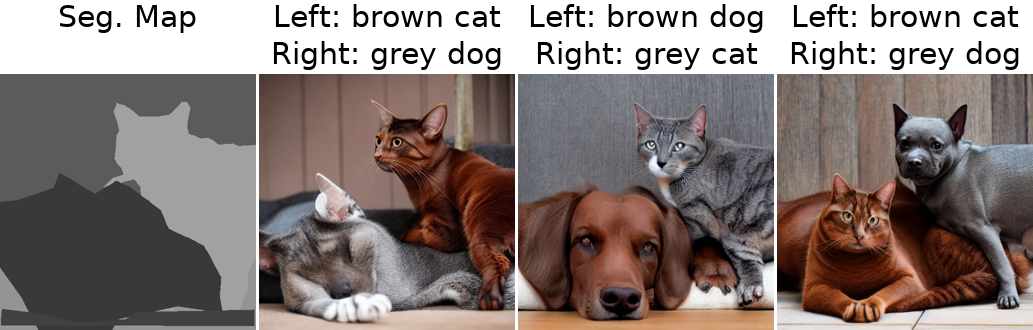

In [286]:
FONTSIZE = 30
FONTSIZE2 = 30

whichbatch = 0
whichseed = 3

imgs = []
labeltexts = []
sublabeltexts= []

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1/generated_catdog.pkl_1", 0, 2, use_seg=True)
paramtext = DrawText(f"Seg. Map", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)
sublabel = DrawText(f"", fontsize=FONTSIZE2, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)
imgs.append(img)
labeltexts.append(paramtext)
sublabeltexts.append(sublabel)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1/generated_catdog.pkl_1", whichbatch, whichseed)
paramtext = DrawText(f"Left: brown dog", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)
sublabel = DrawText(f"Right: grey cat", fontsize=FONTSIZE2, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)
imgs.append(img)
labeltexts.append(paramtext)
sublabeltexts.append(sublabel)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1/generated_catdog.pkl_1", 1, whichseed)
paramtext = DrawText(f"Left: brown cat", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)
sublabel = DrawText(f"Right: grey dog", fontsize=FONTSIZE2, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)
imgs.append(img)
labeltexts.append(paramtext)
sublabeltexts.append(sublabel)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5/generated_catdog.pkl_1", whichbatch, whichseed)
paramtext = DrawText(f"Left: brown dog", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)
sublabel = DrawText(f"Right: grey cat", fontsize=FONTSIZE2, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)
imgs.append(img)
labeltexts.append(paramtext)
sublabeltexts.append(sublabel)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5/generated_catdog.pkl_1", 1, whichseed)
paramtext = DrawText(f"Left: brown cat", fontsize=FONTSIZE, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)
sublabel = DrawText(f"Right: grey dog", fontsize=FONTSIZE2, width=img.get_width(), height=FONTSIZE+4, color=(0,0,0), bold=False, italic=False)
imgs.append(img)
labeltexts.append(paramtext)
sublabeltexts.append(sublabel)

    
todraw_ediffi = DrawRow(*imgs)
todraw_ediffi_labels = DrawRow(*labeltexts)
todraw_ediffi_sublabels = DrawRow(*sublabeltexts)

todraw_ediffi = DrawCol(todraw_ediffi_labels, todraw_ediffi_sublabels, todraw_ediffi)

print(todraw_ediffi.get_width(), todraw_ediffi.get_height())
img = todraw_ediffi.drawself()
print(img.size)
display(img)